# Data Agumentation Problem
#### Here you need to compare two models with and without agumentation to see the difference

### Import libraries

In [51]:
import glob
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Read Images

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_aug-20221101T192103Z-001.zip to data_aug-20221101T192103Z-001 (1).zip


In [69]:
# First we should read all the images from the provided directory,
# 1. first unzip the .zip file attached with homeworks
# 2. read images from directory
# 3. create labels array



########################
## PUT YOUR CODE HERE ##
########################
! unzip data_aug-20221101T192103Z-001.zip

Archive:  data_aug-20221101T192103Z-001.zip
replace data_aug/cat.7305.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_aug/cat.7305.jpg   
  inflating: data_aug/dog.12247.jpg  
  inflating: data_aug/dog.306.jpg    
  inflating: data_aug/cat.4344.jpg   
  inflating: data_aug/cat.1807.jpg   
  inflating: data_aug/dog.11833.jpg  
  inflating: data_aug/cat.5077.jpg   
  inflating: data_aug/dog.10221.jpg  
  inflating: data_aug/dog.6503.jpg   
  inflating: data_aug/cat.5009.jpg   
  inflating: data_aug/cat.7738.jpg   
  inflating: data_aug/dog.9719.jpg   
  inflating: data_aug/dog.9374.jpg   
  inflating: data_aug/cat.10172.jpg  
  inflating: data_aug/cat.2482.jpg   
  inflating: data_aug/dog.42.jpg     
  inflating: data_aug/cat.1021.jpg   
  inflating: data_aug/dog.658.jpg    
  inflating: data_aug/dog.1989.jpg   
  inflating: data_aug/dog.6891.jpg   
  inflating: data_aug/dog.301.jpg    
  inflating: data_aug/cat.1666.jpg   
  inflating: data_aug/dog.4439.jpg   
  inflating

In [4]:
def get_data():
  x_train = []
  y_train = []
  for x in os.listdir('data_aug'):
    x_train.append(np.array(Image.open(os.path.join("data_aug" , x)).convert("RGB")))
    y_train.append(int(x.split('.')[0]=="dog"))

  return np.array(x_train), np.array(y_train)

### Prepare Dataset

In [5]:
images, labels = get_data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


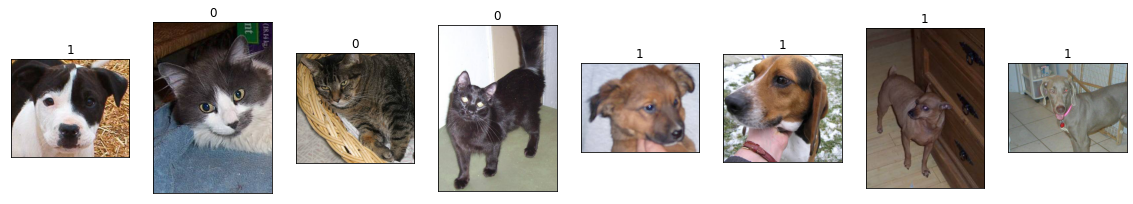

In [6]:
plt.figure(figsize=(20,25))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[i])

In [149]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
x_train = images / 255

In [150]:
# Resize your images to (28 * 28)


########################
## PUT YOUR CODE HERE ##
########################
# m = x_train.shape[0]
x_train = np.array([cv2.resize(x , (28,28)) for x in x_train])
x_train[0].shape

(28, 28, 3)

In [151]:
# Flatten your dataset images 


########################
## PUT YOUR CODE HERE ##
########################
x_train = x_train.reshape(x_train.shape[0], -1)
y_train = labels.reshape(labels.shape[0], 1)
x_train.shape

(100, 2352)

In [152]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
## PUT YOUR CODE HERE ##
########################
assert x_train.shape == (100 , 28 * 28 * 3)
assert y_train.shape == (100, 1)

### Create your Model

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [154]:
batch_size = 128

In [155]:
def build_model(x_train):
  model = Sequential()
  model.add(Input(shape=x_train[0].shape))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [156]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
########################
model = build_model(x_train)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               301184    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 309,505
Trainable params: 309,505
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Split your dataset to test and train with your desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
########################
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, shuffle=True)

In [158]:
def compile_and_fit(model, x_train, y_train, epochs):
  model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
  )

  history = model.fit(
      x_train, y_train,
      batch_size=batch_size,
      epochs=epochs,
      validation_split=0.2,
      shuffle=True
    )
  return history

In [159]:
# Compile with your desired optimizer and loss function with 'accuracy' as metric
# # Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
history = compile_and_fit(model, x_train, y_train, 60)

########################



Epoch 1/60
1/1 [==============================] - 1s 739ms/step - loss: 0.7404 - accuracy: 0.4643 - val_loss: 1.2340 - val_accuracy: 0.2857
Epoch 2/60
1/1 [==============================] - 0s 33ms/step - loss: 0.9001 - accuracy: 0.5357 - val_loss: 0.6626 - val_accuracy: 0.6429
Epoch 3/60
1/1 [==============================] - 0s 36ms/step - loss: 0.6857 - accuracy: 0.4821 - val_loss: 0.6376 - val_accuracy: 0.7143
Epoch 4/60
1/1 [==============================] - 0s 37ms/step - loss: 0.7035 - accuracy: 0.4643 - val_loss: 0.7127 - val_accuracy: 0.4286
Epoch 5/60
1/1 [==============================] - 0s 38ms/step - loss: 0.6424 - accuracy: 0.7857 - val_loss: 0.8154 - val_accuracy: 0.2857
Epoch 6/60
1/1 [==============================] - 0s 57ms/step - loss: 0.6451 - accuracy: 0.5714 - val_loss: 0.7869 - val_accuracy: 0.3571
Epoch 7/60
1/1 [==============================] - 0s 37ms/step - loss: 0.6222 - accuracy: 0.6071 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 8/60
1/1 [==========

### Plot results

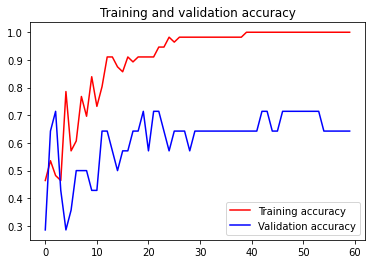

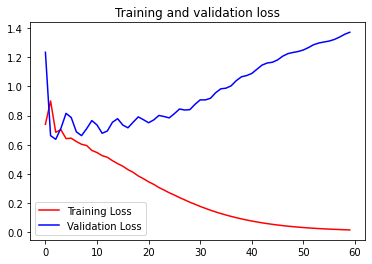

In [160]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [161]:
def evaluate(model, x_train, y_train, x_test, y_test):
    loss, acc = model.evaluate(
    x_train, y_train, batch_size=batch_size, verbose=1
    )
    test_loss, test_acc = model.evaluate(
        x_test, y_test, batch_size=batch_size, verbose=1
    )
    print(f"Train Loss: {loss}, Train Accuracy: {acc}")
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

In [162]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
evaluate(model, x_train, y_train, x_test, y_test)
########################


1/1 [==============================] - 0s 21ms/step - loss: 2.1171 - accuracy: 0.5333
Train Loss: 0.28661924600601196, Train Accuracy: 0.9285714030265808
Test Loss: 2.117107629776001, Test Accuracy: 0.5333333611488342


# Compare results with and without using agumentation
### Now we need to do agumentation to create more images to help us overcome underfitting

### Agumentation Methods
Here you should do the agumentation methods to produce more images


In [21]:
# In this cell you need to implement agumentation methods to increase our data
# NOTICE! Only use libraries in CV2 or others, DON'T use KERAS and Pytorch!


def fill(img, h, w):
    ''' 
    we use this function to resize the shifted image and fill border pixles with different methods
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          h: an integer defining the height of target image
          w: an integer defining the width of target image
    
    output: resized and interpolated image 

    '''
        
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img


def horizontal_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image horizontally with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate horizontally shift to right and left with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''
    
    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio) # you can change this
    h, w = img.shape[:2]
    to_shift = w*ratio
    if ratio > 0:
        img = img[:, :int(w-to_shift), :]
    if ratio < 0:
        img = img[:, int(-1*to_shift):, :]

    img = fill(img, h, w) # fill image borders

    return img


In [22]:
    
def vertical_shift(img, ratio=0.5):

    ''' 
    we use this function to shift the image vertically with the given ratio
    width_target = width_input - ratio * width_input
    
    Hint: select ratio in range (-ratio to ratio) uniformly, to simulate vertically shift to up and down with different ratios


    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          ratio: a float number between 0 and 1
    
    output: resized and interpolated image 

    '''

    if ratio > 1 or ratio < 0:
        print('Value should be less than 1 and greater than 0')
        return img
    ratio = random.uniform(-ratio, ratio)
    h, w = img.shape[:2]
    to_shift = h*ratio
    if ratio > 0:
        img = img[:int(h-to_shift), :, :]
    if ratio < 0:
        img = img[int(-1*to_shift):, :, :]
        
    img = fill(img, h, w)

    return img



In [23]:
def brightness(img, low, high):

    ''' 
    we use this function to change the brightness of the image with given high and low values
    
    Hint: first convert to HSV color domain, Next make your image brighter or darker then convert back to BGR

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          low:
          high:
    
    output: image with different brightness

    '''

    value = random.uniform(low, high)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value 
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    
    return img

In [24]:

def zoom(img, value):

    ''' 
    we use this function to zoom the image with given value
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the zoom effect
    
    output: zoomed image

    '''
    
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    
    img = fill(img, h, w)

    return img

In [25]:
def channel_shift(img, value):

    ''' 
    we use this function to shift color channels to play with colors in the image
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
          value: an integer number indicating the color change effect
    
    output: image with changed colors

    '''
    
    value = int(random.uniform(-value, value))
    img = img + value
    img[:,:,:][img[:,:,:]>255]  = 255
    img[:,:,:][img[:,:,:]<0]  = 0
    img = img.astype(np.uint8)
    
    return img

In [26]:
def horizontal_flip(img):

    ''' 
    we use this function to flip the image horizontally

    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: horizontally fliped image

    '''

    return cv2.flip(img, 1)


In [27]:
def vertical_flip(img):

    ''' 
    we use this function to flip the image vertically
    
    arguments 
    input img: a Numpy ndarray from any size of h * w * ch
    
    output: vertically fliped image

    '''
    
    return cv2.flip(img, 0)


### Prepare your dataset

In [136]:
# For each image in our dataset run the previous methods and create a new dataset

    ########################
    ## PUT YOUR CODE HERE ##

images_1 = []
for image in images:
    images_1.append(image)
    images_1.append(horizontal_shift(image))
    images_1.append(vertical_shift(image))
    images_1.append(brightness(image, 0.5, 2))
    images_1.append(zoom(image, 0.5))
    images_1.append(channel_shift(image, 10))
    images_1.append(horizontal_flip(image))
    images_1.append(vertical_flip(image))

    ########################


In [137]:

# Extend your labels array new size with correct labels maped to each agumented image

    ########################
    ## PUT YOUR CODE HERE ##

labels_1 = []
for label in labels:
  labels_1 += [label for i in range(8)]

    ########################


In [138]:
# Normalize your dataset in a way to have a image dataset with pixles in range (0 to 1)

########################
## PUT YOUR CODE HERE ##
########################
x_train_1 = np.array(images_1) / 255
y_train_1 = np.array(labels_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [139]:
# Resize your images to (28 * 28)


########################
## PUT YOUR CODE HERE ##
x_train_1 = np.array([cv2.resize(x , (28,28)) for x in x_train_1])
x_train_1[0].shape
########################


(28, 28, 3)

In [140]:
# Flatten your dataset images 


########################
## PUT YOUR CODE HERE ##
x_train_1 = x_train_1.reshape(x_train_1.shape[0], -1)
y_train_1 = y_train_1.reshape(y_train_1.shape[0], 1)
x_train_1.shape
########################


(800, 2352)

In [141]:
# Check your dataset and labels to be a numpy ndarray of sizes (800, 28 * 28 * 3) and (800, 1) respectively.


########################
## PUT YOUR CODE HERE ##
assert x_train_1.shape == (800 , 28 * 28 * 3)
assert y_train_1.shape == (800, 1)
########################

### Create your model

In [142]:
# create a simple model of Keras MLP with desired number of dense layers and units and activation function
# don't forget to shuffle the data
# this is a binary classification problem



########################
## PUT YOUR CODE HERE ##
model_1 = build_model(x_train_1)
########################

In [143]:
# Split your dataset to test and train with the desired implementation
# use sklearn.model_selection.train_test_split


########################
## PUT YOUR CODE HERE ##
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_train_1, y_train_1, test_size=0.3, shuffle=True)

########################

In [144]:
# Compile your model to introduce loss function optimizer and metrices to monitor accuracy metric and train on the data
# Don't forget to monitor the overfitting, you should take care of val_accuracy and val_loss

########################
## PUT YOUR CODE HERE ##
#
# uncomment below and complete the code
history = compile_and_fit(model_1, x_train_1, y_train_1, 60)

########################



Epoch 1/60
4/4 [==============================] - 1s 63ms/step - loss: 0.8856 - accuracy: 0.4955 - val_loss: 0.7756 - val_accuracy: 0.4821
Epoch 2/60
4/4 [==============================] - 0s 16ms/step - loss: 0.7215 - accuracy: 0.5290 - val_loss: 0.7224 - val_accuracy: 0.5179
Epoch 3/60
4/4 [==============================] - 0s 15ms/step - loss: 0.7201 - accuracy: 0.4554 - val_loss: 0.7103 - val_accuracy: 0.4821
Epoch 4/60
4/4 [==============================] - 0s 15ms/step - loss: 0.7033 - accuracy: 0.5134 - val_loss: 0.6955 - val_accuracy: 0.5179
Epoch 5/60
4/4 [==============================] - 0s 15ms/step - loss: 0.6813 - accuracy: 0.5335 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 6/60
4/4 [==============================] - 0s 15ms/step - loss: 0.6646 - accuracy: 0.5893 - val_loss: 0.6952 - val_accuracy: 0.5268
Epoch 7/60
4/4 [==============================] - 0s 15ms/step - loss: 0.6628 - accuracy: 0.5804 - val_loss: 0.6954 - val_accuracy: 0.4911
Epoch 8/60
4/4 [===========

### Plot your results

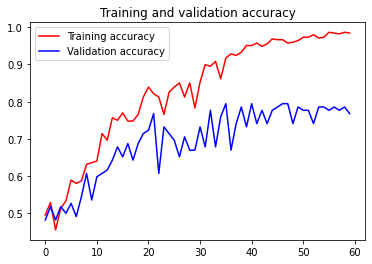

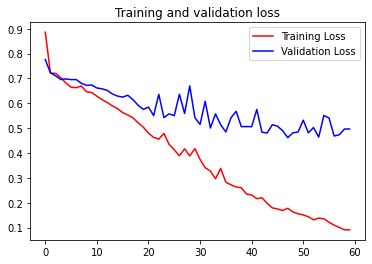

In [145]:
# Plot your data

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate results

In [146]:
# Evaluate your model on the test data


########################
## PUT YOUR CODE HERE ##
evaluate(model_1, x_train_1, y_train_1, x_test_1, y_test_1)

########################


2/2 [==============================] - 0s 9ms/step - loss: 0.4709 - accuracy: 0.7875
Train Loss: 0.17803941667079926, Train Accuracy: 0.9410714507102966
Test Loss: 0.47091227769851685, Test Accuracy: 0.7875000238418579


# Compare your results with and without using agumentation to see the difference

## Optional Bonus Activity

In [72]:
# Optional

# Keras data Augmentation

#use the bellow links

# https://keras.io/guides/keras_cv/custom_image_augmentations/

# https://keras.io/api/preprocessing/image/

from google.colab import files
uploaded = files.upload()

Saving dogs_cats.zip to dogs_cats.zip


In [73]:
! unzip dogs_cats.zip

Archive:  dogs_cats.zip
   creating: dogs_cats/
   creating: dogs_cats/cats/
  inflating: dogs_cats/cats/cat.10172.jpg  
  inflating: dogs_cats/cats/cat.10195.jpg  
  inflating: dogs_cats/cats/cat.1021.jpg  
  inflating: dogs_cats/cats/cat.10949.jpg  
  inflating: dogs_cats/cats/cat.11521.jpg  
  inflating: dogs_cats/cats/cat.11535.jpg  
  inflating: dogs_cats/cats/cat.11843.jpg  
  inflating: dogs_cats/cats/cat.119.jpg  
  inflating: dogs_cats/cats/cat.11946.jpg  
  inflating: dogs_cats/cats/cat.11959.jpg  
  inflating: dogs_cats/cats/cat.12263.jpg  
  inflating: dogs_cats/cats/cat.12479.jpg  
  inflating: dogs_cats/cats/cat.1666.jpg  
  inflating: dogs_cats/cats/cat.1807.jpg  
  inflating: dogs_cats/cats/cat.1848.jpg  
  inflating: dogs_cats/cats/cat.2098.jpg  
  inflating: dogs_cats/cats/cat.223.jpg  
  inflating: dogs_cats/cats/cat.225.jpg  
  inflating: dogs_cats/cats/cat.2326.jpg  
  inflating: dogs_cats/cats/cat.2479.jpg  
  inflating: dogs_cats/cats/cat.2482.jpg  
  inflating: 

In [109]:
data = [ImageDataGenerator()]
data.append(ImageDataGenerator(width_shift_range=0.5))
data.append(ImageDataGenerator(height_shift_range=0.5))
data.append(ImageDataGenerator(brightness_range=[0.5, 2]))
data.append(ImageDataGenerator(zoom_range=0.5))
data.append(ImageDataGenerator(channel_shift_range=10))
data.append(ImageDataGenerator(horizontal_flip=True))
data.append(ImageDataGenerator(vertical_flip=True))

for i in range(8):
  os.mkdir(f'./datagen-output-{i}')
  train_generator = data[i].flow_from_directory(
        './dogs_cats/',
        batch_size=100,
        class_mode='binary',
        color_mode='rgb',
        save_format='jpg',
        shuffle=False,
        save_to_dir=f'./datagen-output-{i}')
  next(iter(train_generator))

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


### method 2

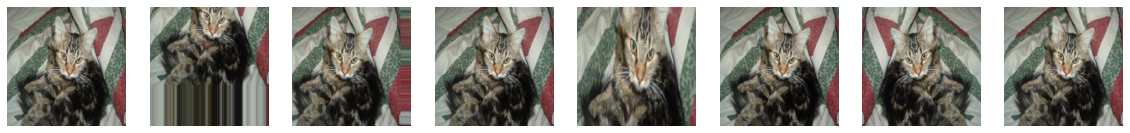

In [121]:
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(20,20))

for i in range(8):
  file_list = [filename for filename in os.listdir(f'./datagen-output-{i}/') if filename.startswith(f"_{0}_")]
  file_path = f'./datagen-output-{i}/' + file_list[0]
  img = Image.open(file_path)
  ax[i].imshow(img)
  ax[i].axis('off')

### method 1

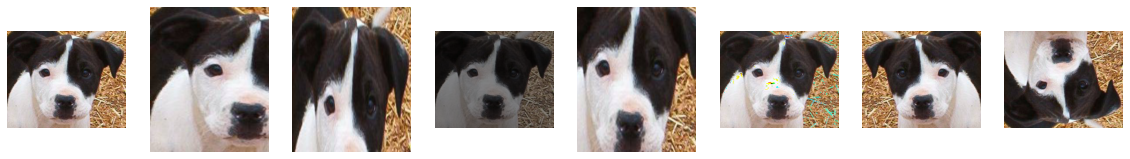

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(20,20))

for i in range(8):
  ax[i].imshow(images_1[i])
  ax[i].axis('off')